# Homework 1

Use the decision tree classification technique on the HW1 dataset. This dataset is provided on the course website and contains data about consumers and their decisions to terminate a contract (i.e., consumer churn problem).

Data description:

Col.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
12    churndep   Did the customer churn (1=Yes; 0=No)


Build a decision tree model that predicts whether a consumer will terminate his/her contract. In particular, I would like for you to create a decision tree using entropy with no max depth. Explore how well the decision trees perform for several different parameter values (e.g., for different splitting criteria). Interpret the model (decision tree) that provides the best predictive performance. 
Some possible issues / hints to think about: using training vs. test datasets.
Present a brief overview of your predictive modeling process, explorations, and discuss your results. Make sure you present information about the model “goodness” (please report the confusion matrix, predictive accuracy, classification error, precision, recall, f-measure).

Present a brief overview of your predictive modeling process. That is, you need to lay out the steps you have taken in order to build and evaluate the decision tree model. For instance, how did you explore the data set before you built the model? Write this report in a way that the upper level management of the team would understand what you are doing. Why is the decision tree an appropriate model for this problem? How can we evaluate the predictive ability of the decision tree? If you build decision trees with different splitting criteria, which decision tree would you prefer to use in practice?


### Setup

In [1]:
# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

# Numpy is the fundamental package for scientific computing with Python. 
# SciPy (pronounced "Sigh Pie") is an open source Python library used for scientific computing and technical computing. 
# Os module provides a portable way of using operating system dependent functionality.
import numpy as np
import scipy as sp
import pandas as pd
import os
import seaborn as sns # sns is an alias pointing to seaborn
sns.set(color_codes=True) #Set aesthetic parameters in one step. Remaps the shorthand color codes (e.g. “b”, “g”, “r”, etc.) to the colors from this palette.

# Seed the generator to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt #pyplot is matplotlib's plotting framework https://matplotlib.org/users/pyplot_tutorial.html
# Dynamically change the default rc settings in a python script
# See documentation for a complete list of parameters https://matplotlib.org/users/customizing.html
plt.rcParams['axes.labelsize'] = 14  # fontsize of the x any y labels
plt.rcParams['xtick.labelsize'] = 12 # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 12 # fontsize of the tick labels

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

# Define path of an image
# Function that takes as input fig_id and returns back the image path
def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

# Save image in a specific path
# Function that takes as input fig_id and saves the image in a specific format (i.e., png, 300 dpi)
def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

### Import Data

In [2]:
data = pd.read_csv('HW1_Data.csv',sep=',')
data.head(5)

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
0,83.53,20.00,1.0,31,745,1,0,0,0,0,4,1
1,29.99,0.00,0.0,52,1441,0,0,0,1,1,3,1
2,37.75,2.67,0.0,25,572,0,0,0,1,1,3,1
3,5.25,0.00,0.0,45,1354,0,0,0,0,0,2,1
4,42.71,8.67,0.0,27,224,1,0,0,0,0,3,1


### Data Cleansing

In [3]:
print(data.shape)
data.describe()

(31891, 12)


,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
count,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000
mean,58.665179,24.951385,8.065277,18.761908,391.222633,0.894704,0.363175,0.057163,0.184817,0.676931,0.044088,0.497162
std,44.163859,34.790147,16.610589,9.548019,254.998478,0.306939,0.480922,0.232158,0.388155,0.467656,0.224552,0.500000
min,-5.860000,0.000000,0.000000,6.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.450000,3.000000,0.000000,11.000000,212.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.380000,13.330000,2.000000,17.000000,341.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,71.040000,33.330000,9.000000,24.000000,530.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,861.110000,610.330000,404.000000,60.000000,1812.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
data1 = data[data.revenue >= 0]
data1 = data1[data1.eqpdays >=0]
data1.describe()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
count,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000
mean,58.622173,24.926872,8.052027,18.757097,391.789222,0.894705,0.363177,0.057248,0.184933,0.677113,0.043964,0.497362
std,44.101060,34.747400,16.543853,9.546107,254.746976,0.306937,0.480923,0.232319,0.388249,0.467587,0.224189,0.500001
min,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.440000,3.000000,0.000000,11.000000,212.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.335000,13.330000,2.000000,16.000000,341.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,70.970000,33.330000,9.000000,24.000000,530.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,861.110000,610.330000,404.000000,60.000000,1812.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
print(type(data1))
print(data1.shape)
data = data1

<class 'pandas.core.frame.DataFrame'>
(31844, 12)


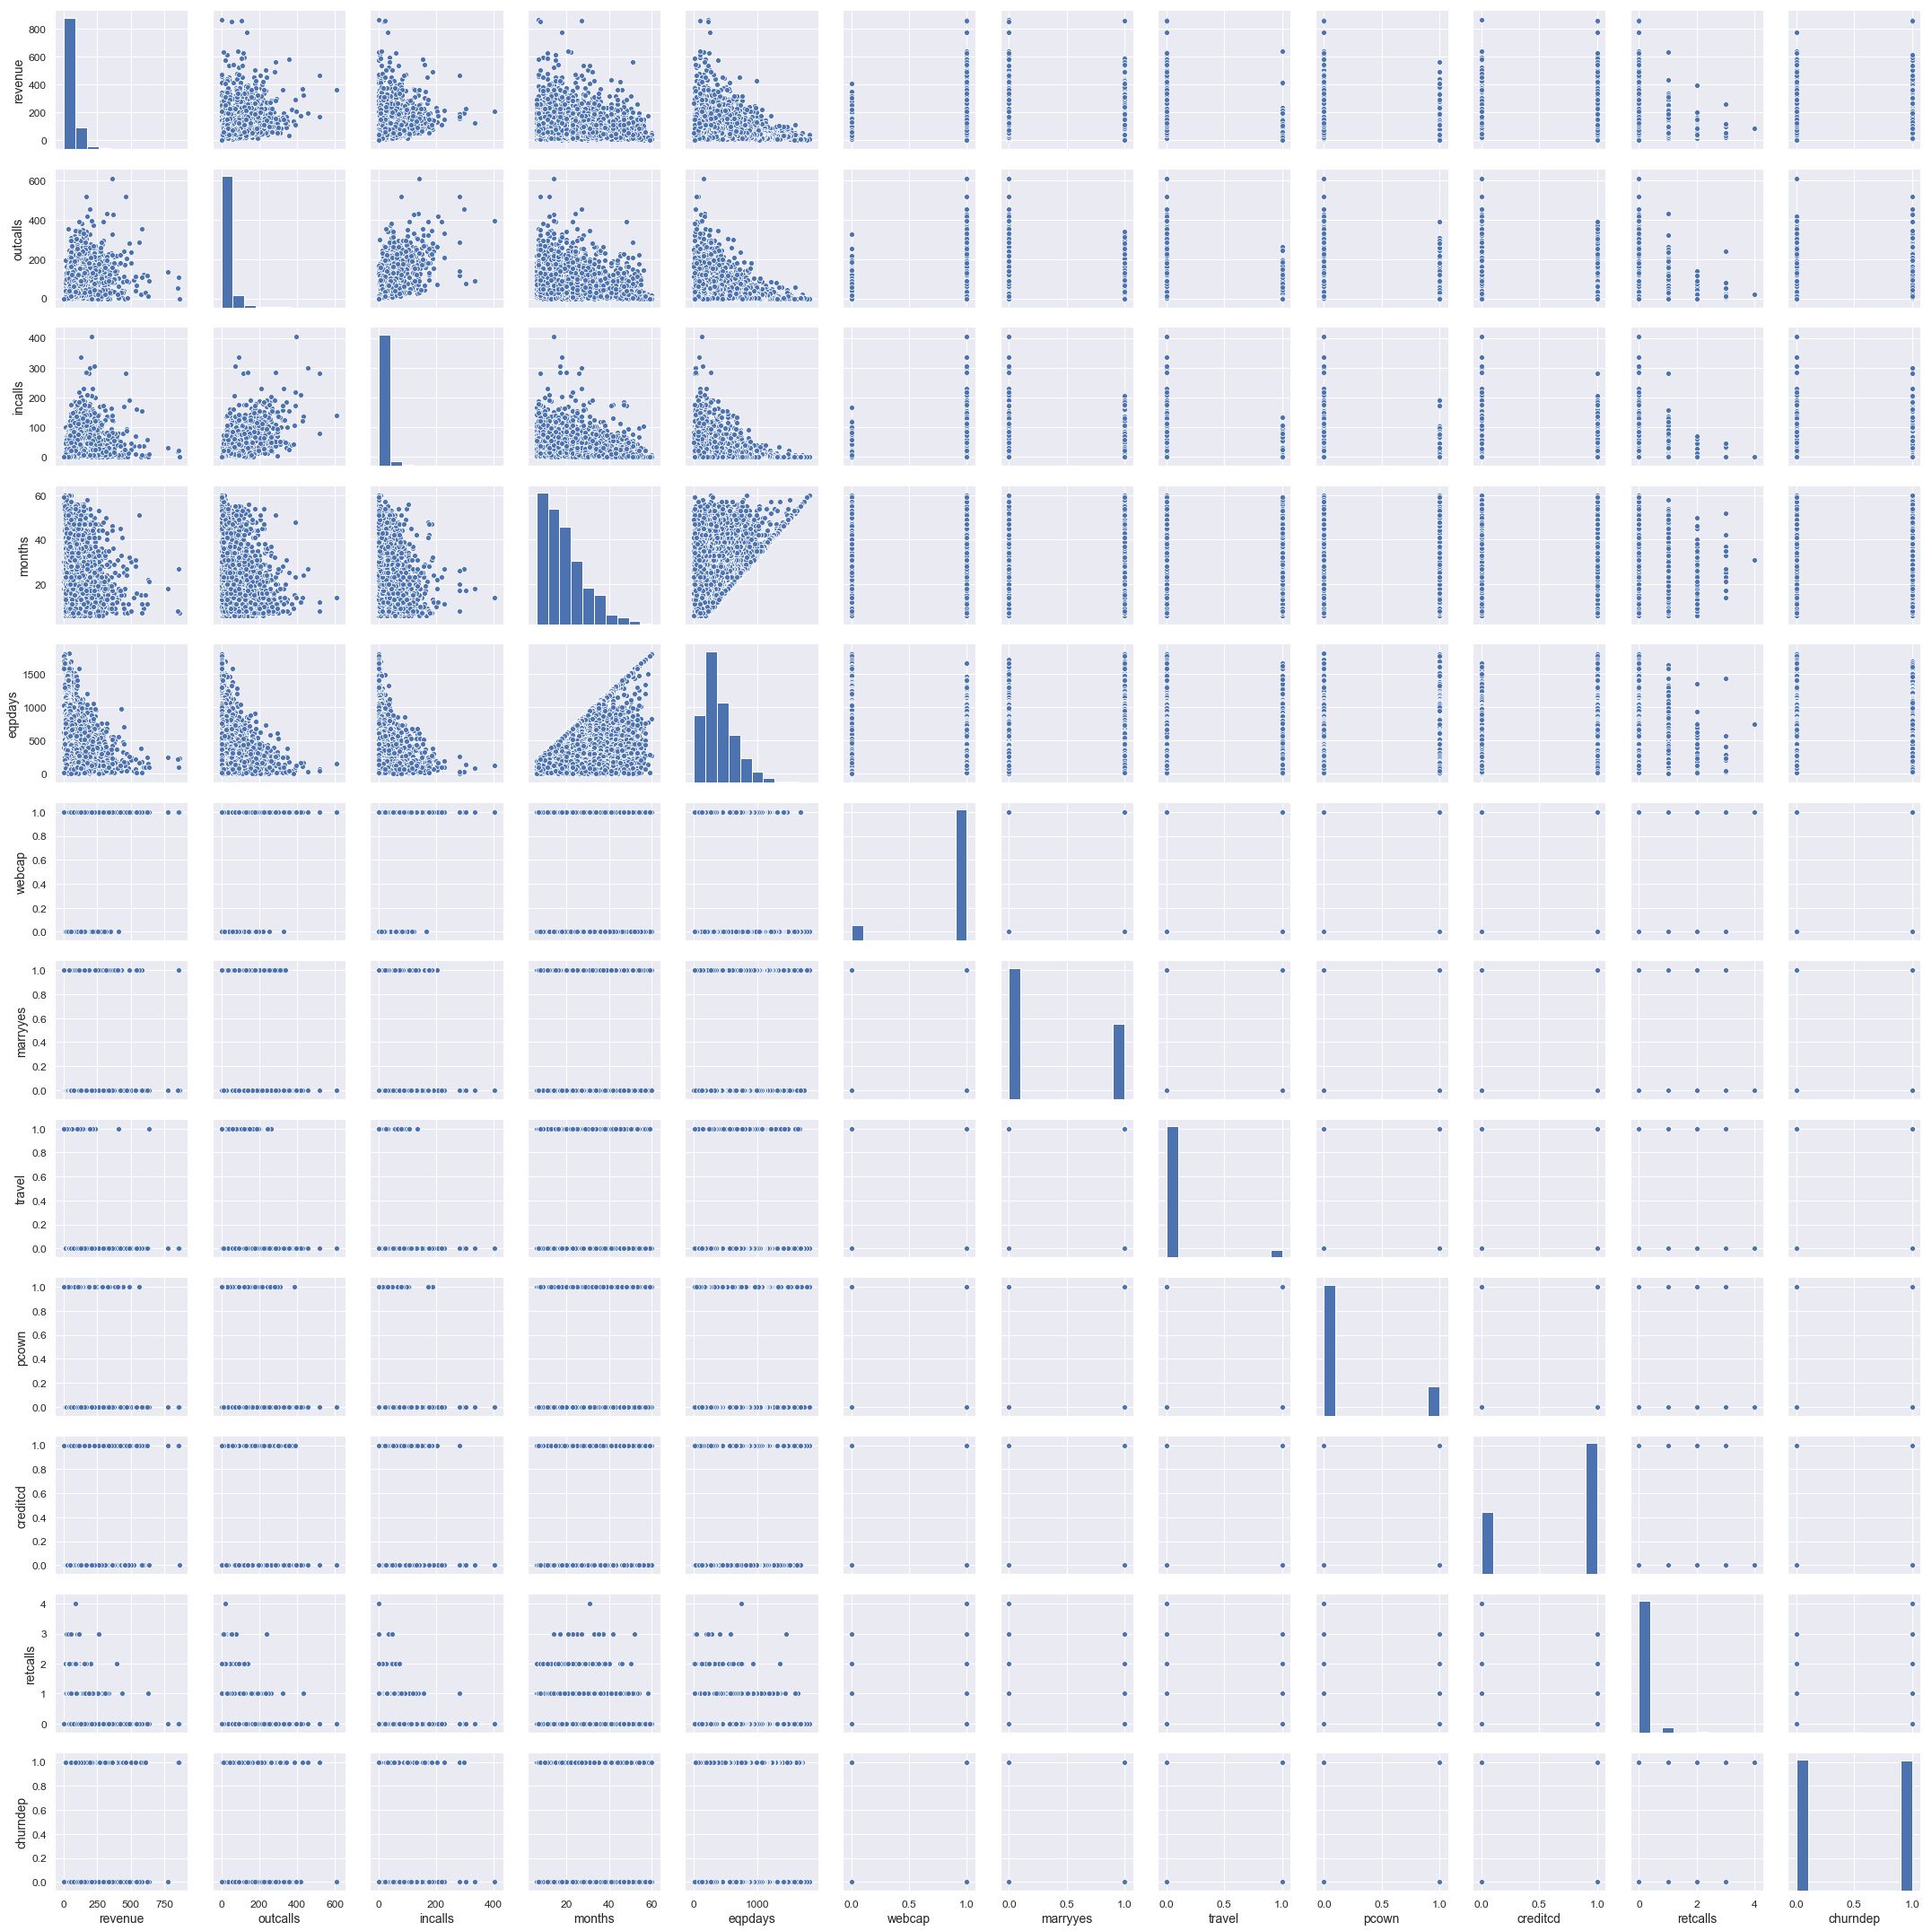

In [9]:
sns.pairplot(data)

The frequency of instances per class is:  {0.0: 16006, 1.0: 15838}
The names of the two distinct classes are:  ['No', 'Yes']
Revenue statistics:  DescribeResult(nobs=31844, minmax=(0.0, 861.11), mean=58.62217340786334, variance=1944.9035121903858, skewness=3.827841581552096, kurtosis=31.498666885386058)
Months statistics:  DescribeResult(nobs=31844, minmax=(6.0, 60.0), mean=18.75709709835448, variance=91.12816462191917, skewness=1.0476046749175285, kurtosis=0.8590660335599347)


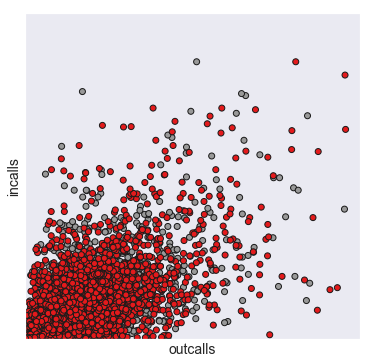

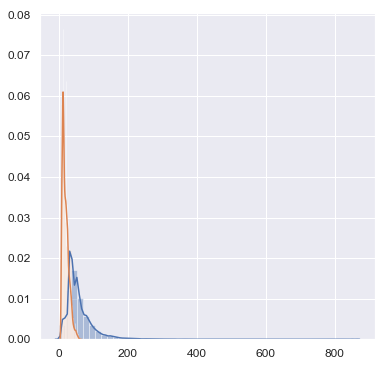

In [41]:
from sklearn.tree import DecisionTreeClassifier # The sklearn.tree module includes decision tree-based models for 
from scipy import stats #Documentation stats package of scipy https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

######################################### Data Exploration #########################################

# Retrieving Attributes
X = data.values[:, :11] # keep specific attributs (i.e., third column and beyond); keep petal length and width
# Retriving Target Variable
y = data.values[:,11]
# Exploring Target Variable
unique, counts = np.unique(y, return_counts=True)
print("The frequency of instances per class is: " , dict(zip(unique, counts)))
print("The names of the two distinct classes are: ", ['No','Yes']) 

######################################### Visualizations #########################################

# Visual inspection of dataset
# Plot the training points
x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5 # Estimate x axis limits based on dataset
y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5 # Estimate y axis limits based on dataset

plt.figure(2, figsize=(6, 6)) # Set dimensions of new figure and figure id https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html
plt.clf() # Clear the current figure

plt.scatter(1.5*X[:, 1], 1.5*X[:, 2], c=y, cmap=plt.cm.Set1,
            edgecolor='k') # c, cmap, and edgecolor are parameters for color
                           # see scatter documentation here https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.xlabel('outcalls') # x label name
plt.ylabel('incalls')  # y label name

plt.xlim(x_min, x_max) # Set x axis limits
plt.ylim(y_min, y_max) # Set y axis limits
plt.xticks(()) # Get the current tick locations and labels of the x-axis
plt.yticks(()) # Get the current tick locations and labels of the y-axis

# Drawing a histogram of attributes and fitting a kernel density estmator
plt.figure(3, figsize=(6, 6))
sns.distplot(data.values[:,0]) # histogram plot 1
sns.distplot(data.values[:,3]) # histogram plot 2
print("Revenue statistics: ", sp.stats.describe(data.values[:,0])) # sp.stats.describe cmputes several descriptive statistics of the passed array
print("Months statistics: ", sp.stats.describe(data.values[:,3]))

######################################### Model Training #########################################


# The following code trains a DecisionTreeClassifier on the iris dataset
# Decision Tree Induction (Fitting the Model)
# Documentation https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#tree_clf = tree.DecisionTreeClassifier(criterion="entropy", min_samples_split=0.082, min_samples_leaf=5, max_leaf_nodes=25)
#tree_clf.fit(X, y)



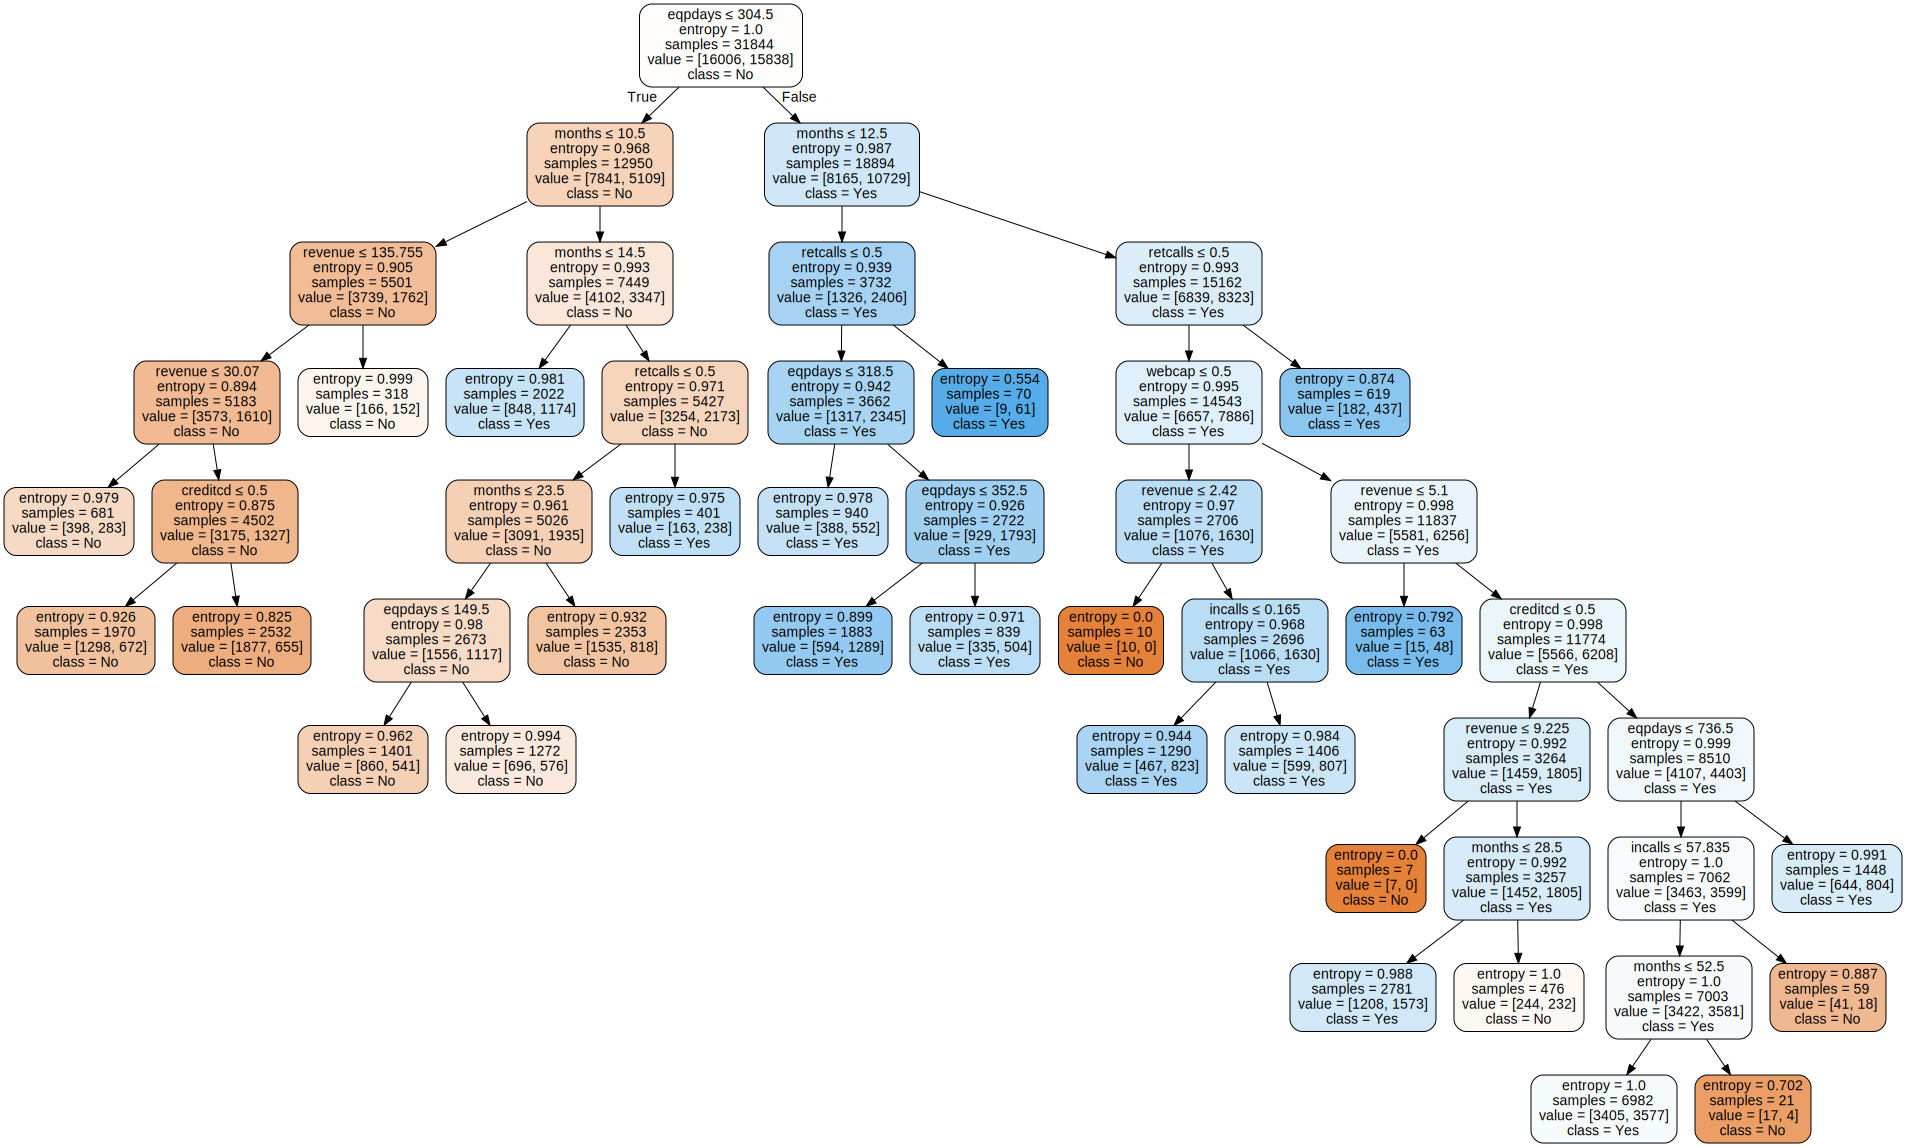

In [7]:
import graphviz #If you get an error "ImportError: No module named graphviz", run in command line "pip install graphviz"
from sklearn import tree

# The following code trains a DecisionTreeClassifier on the iris dataset (all attributes are being used now)
# Decision Tree Induction (Fitting the Model)
clf2 = tree.DecisionTreeClassifier(criterion="entropy", min_samples_split=0.082, min_samples_leaf=5, max_leaf_nodes=25)
clf2 = clf2.fit(data.values[:,:11], data.values[:,11])

dot_data = tree.export_graphviz(clf2, out_file=None, 
                         feature_names=list(data.columns)[:11],  
                         class_names=['No','Yes'],  
                         filled=True, rounded=True,  
                         special_characters=True)

graph = graphviz.Source(dot_data) 
graph

Accuracy: 0.601306368546665
Confusion matrix, without normalization
[[1869 2185]
 [ 989 2918]]
Normalized confusion matrix
[[0.46 0.54]
 [0.25 0.75]]


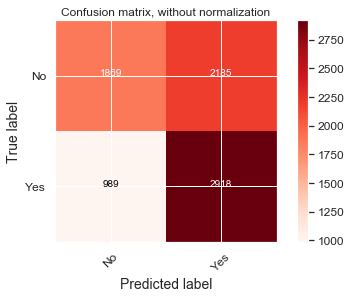

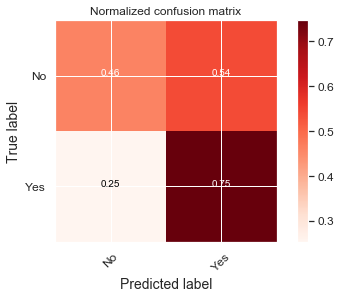

In [44]:
######################################### Imports #########################################
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


###################################### Split the Data ######################################

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Note: Always a good idea to shuffle the dataset before you split it into training and testing
# train_test_split performs shuffling by default

############################# Build Model & Apply it to the Test Set #######################

#Build the decision tree
#sklearn.tree.DecisionTreeClassifier(criterion=’gini’, splitter=’best’, 
#   max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#   max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
#   min_impurity_split=None, class_weight=None, presort=False)
clf3 = tree.DecisionTreeClassifier(criterion="entropy", 
                                   min_samples_split=0.082, 
                                   min_samples_leaf=5, 
                                   max_leaf_nodes=25)
# "clf3.fit(X_train, y_train)"" fits the model and then
# ".predict(X_test)" makes predicitions based on the test set
y_pred = clf3.fit(X_train, y_train).predict(X_test)

###################################### Confusion Matrix #####################################


# Function that prints and plots the confusion matrix.
# Normalization can be applied by setting `normalize=True` (see below for examples)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print("Accuracy:",accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))
    
# Compute confusion matrix to evaluate the accuracy of a classification    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No','Yes'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No','Yes'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()